# Music Genre Classification

### Used Libraries : 
1. librosa, librosa.display
2. matplotlib
3. numpy
4. os
5. math
6. json

### Dataset Used :
1. GTZAN Dataset

In [2]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

Example File is used for demonstrating features of Librosa library

In [3]:
example_file = "disco.00001.wav"

In [4]:
# load audio file with Librosa
signal, sample_rate = librosa.load(example_file)

In [5]:
print(signal)

[-0.18777466 -0.23693848 -0.15542603 ...  0.03741455  0.10574341
  0.09619141]


In [6]:
print(sample_rate)

22050


In [7]:
FIG_SIZE = (16,8)

Waveform of audiofile(example_file) for Amplitude vs. Time. Here transparency is set to 0.5

Text(0.5, 1.0, 'Waveform')

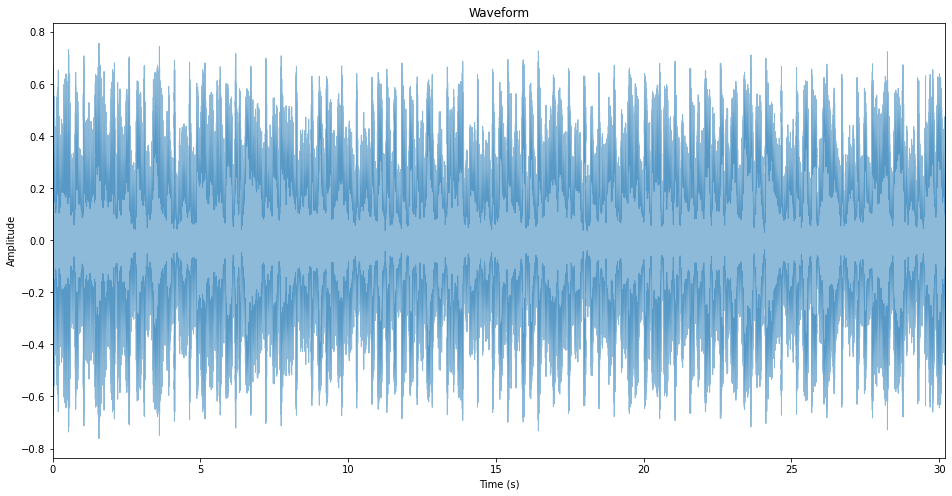

In [8]:
# WAVEFORM
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(signal, sample_rate, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

In [9]:
# Fourier Transform (FFT) - Frequency Domain
fft = np.fft.fft(signal)

In [10]:
# Calculate the Magnitude (abs values on complex numbers)
spectrum = np.abs(fft)

In [11]:
# Create the Frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

Below is the plotting of Power Spectrum for the example audio taken. This is to be noted that the plot is symmetrical hence only half of it is required.

Text(0.5, 1.0, 'Power Spectrum')

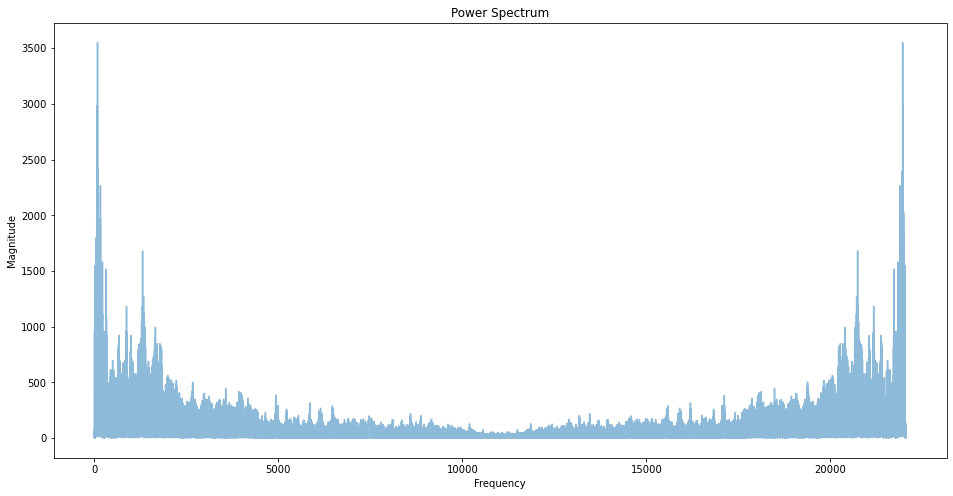

In [12]:
# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(f, spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [13]:
# Take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

Text(0.5, 1.0, 'Power Spectrum')

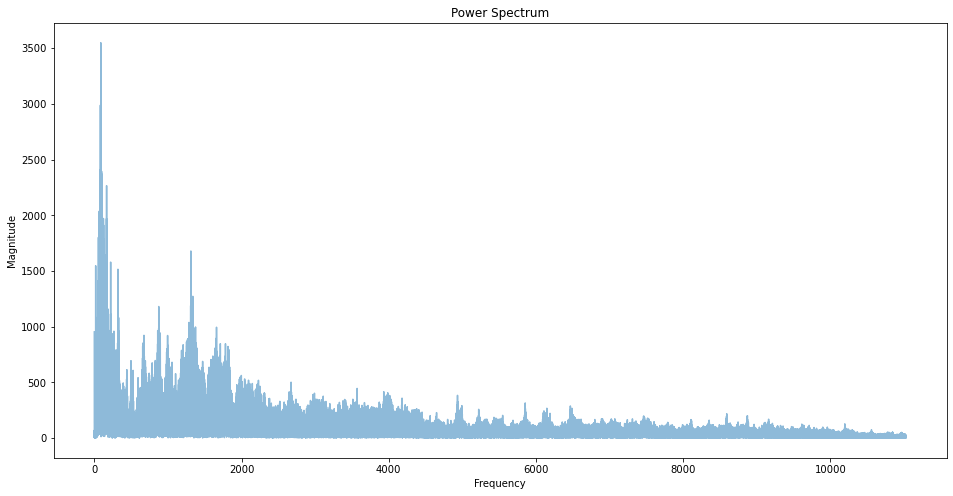

In [14]:
# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [15]:

# Spectrogram (STFT)
hop_length = 512 # num. of samples
n_fft = 2048 # num. of samples for window

In [16]:
# Perform STFT
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

In [17]:
# Calculate the Magnitude (abs values on complex numbers)
spectrogram = np.abs(stft)

Text(0.5, 1.0, 'Spectrogram')

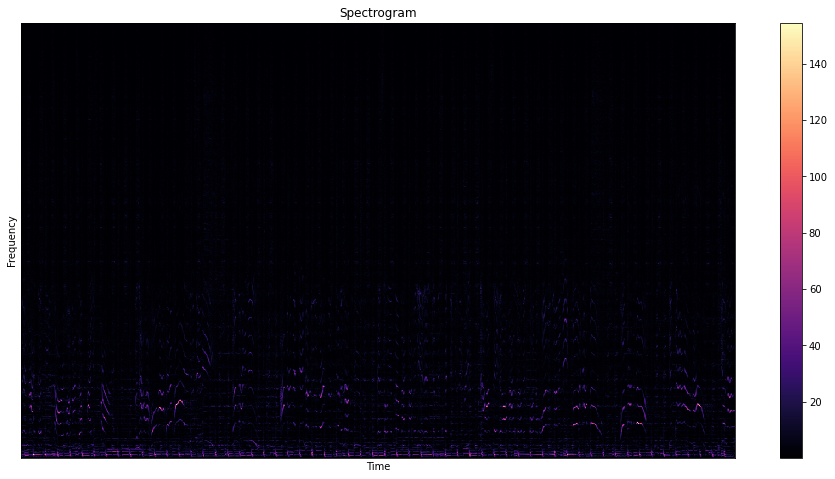

In [18]:
# Plot the Spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

In [19]:
# Apply Logarithm to get values in Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

As the above spectrogram is very dark, hence for the better representation of the spectrogram we use amplitude in decibels.

Text(0.5, 1.0, 'Spectrogram (dB)')

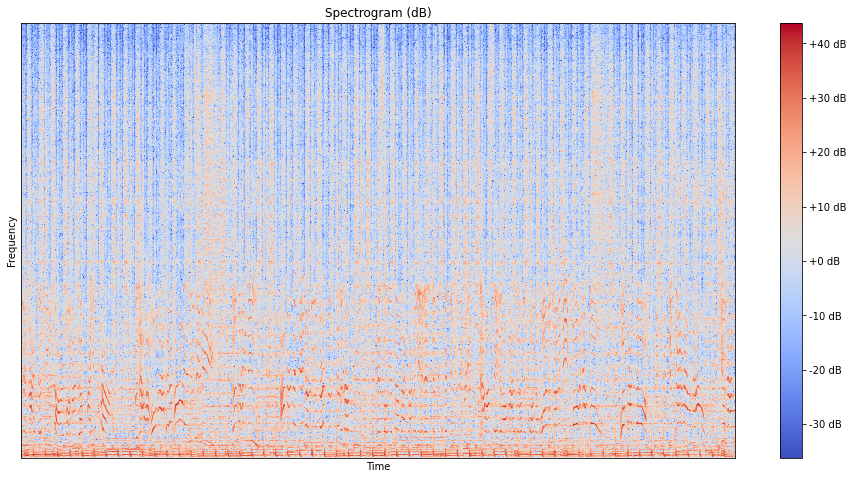

In [20]:
# Plot the Spectrogram in Decibels
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

In [21]:
# MFCCs (we use 13 MFCCs)
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

Text(0.5, 1.0, 'MFCCs')

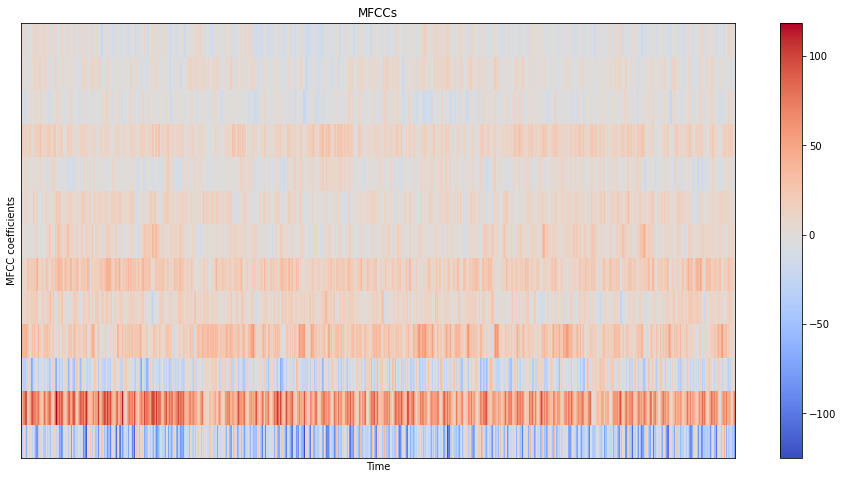

In [22]:

# Plot MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

In [23]:
import json
import os
import math

In [24]:
DATASET_PATH = "./genres"
JSON_PATH = "data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

## MFCC(Mel Frequency Cepstral Coefficents)
These are a feature widely used in automatic speech and speaker recognition.

In [25]:
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along with genre labels.
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

		# load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [26]:
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)


Processing: genres\blues
./genres\blues\blues.00000.wav, segment:1
./genres\blues\blues.00000.wav, segment:2
./genres\blues\blues.00000.wav, segment:3
./genres\blues\blues.00000.wav, segment:4
./genres\blues\blues.00000.wav, segment:5
./genres\blues\blues.00000.wav, segment:6
./genres\blues\blues.00000.wav, segment:7
./genres\blues\blues.00000.wav, segment:8
./genres\blues\blues.00000.wav, segment:9
./genres\blues\blues.00000.wav, segment:10
./genres\blues\blues.00001.wav, segment:1
./genres\blues\blues.00001.wav, segment:2
./genres\blues\blues.00001.wav, segment:3
./genres\blues\blues.00001.wav, segment:4
./genres\blues\blues.00001.wav, segment:5
./genres\blues\blues.00001.wav, segment:6
./genres\blues\blues.00001.wav, segment:7
./genres\blues\blues.00001.wav, segment:8
./genres\blues\blues.00001.wav, segment:9
./genres\blues\blues.00001.wav, segment:10
./genres\blues\blues.00002.wav, segment:1
./genres\blues\blues.00002.wav, segment:2
./genres\blues\blues.00002.wav, segment:3
./genr

./genres\blues\blues.00021.wav, segment:2
./genres\blues\blues.00021.wav, segment:3
./genres\blues\blues.00021.wav, segment:4
./genres\blues\blues.00021.wav, segment:5
./genres\blues\blues.00021.wav, segment:6
./genres\blues\blues.00021.wav, segment:7
./genres\blues\blues.00021.wav, segment:8
./genres\blues\blues.00021.wav, segment:9
./genres\blues\blues.00021.wav, segment:10
./genres\blues\blues.00022.wav, segment:1
./genres\blues\blues.00022.wav, segment:2
./genres\blues\blues.00022.wav, segment:3
./genres\blues\blues.00022.wav, segment:4
./genres\blues\blues.00022.wav, segment:5
./genres\blues\blues.00022.wav, segment:6
./genres\blues\blues.00022.wav, segment:7
./genres\blues\blues.00022.wav, segment:8
./genres\blues\blues.00022.wav, segment:9
./genres\blues\blues.00022.wav, segment:10
./genres\blues\blues.00023.wav, segment:1
./genres\blues\blues.00023.wav, segment:2
./genres\blues\blues.00023.wav, segment:3
./genres\blues\blues.00023.wav, segment:4
./genres\blues\blues.00023.wav, 

./genres\blues\blues.00041.wav, segment:1
./genres\blues\blues.00041.wav, segment:2
./genres\blues\blues.00041.wav, segment:3
./genres\blues\blues.00041.wav, segment:4
./genres\blues\blues.00041.wav, segment:5
./genres\blues\blues.00041.wav, segment:6
./genres\blues\blues.00041.wav, segment:7
./genres\blues\blues.00041.wav, segment:8
./genres\blues\blues.00041.wav, segment:9
./genres\blues\blues.00041.wav, segment:10
./genres\blues\blues.00042.wav, segment:1
./genres\blues\blues.00042.wav, segment:2
./genres\blues\blues.00042.wav, segment:3
./genres\blues\blues.00042.wav, segment:4
./genres\blues\blues.00042.wav, segment:5
./genres\blues\blues.00042.wav, segment:6
./genres\blues\blues.00042.wav, segment:7
./genres\blues\blues.00042.wav, segment:8
./genres\blues\blues.00042.wav, segment:9
./genres\blues\blues.00042.wav, segment:10
./genres\blues\blues.00043.wav, segment:1
./genres\blues\blues.00043.wav, segment:2
./genres\blues\blues.00043.wav, segment:3
./genres\blues\blues.00043.wav, 

./genres\blues\blues.00061.wav, segment:8
./genres\blues\blues.00061.wav, segment:9
./genres\blues\blues.00061.wav, segment:10
./genres\blues\blues.00062.wav, segment:1
./genres\blues\blues.00062.wav, segment:2
./genres\blues\blues.00062.wav, segment:3
./genres\blues\blues.00062.wav, segment:4
./genres\blues\blues.00062.wav, segment:5
./genres\blues\blues.00062.wav, segment:6
./genres\blues\blues.00062.wav, segment:7
./genres\blues\blues.00062.wav, segment:8
./genres\blues\blues.00062.wav, segment:9
./genres\blues\blues.00062.wav, segment:10
./genres\blues\blues.00063.wav, segment:1
./genres\blues\blues.00063.wav, segment:2
./genres\blues\blues.00063.wav, segment:3
./genres\blues\blues.00063.wav, segment:4
./genres\blues\blues.00063.wav, segment:5
./genres\blues\blues.00063.wav, segment:6
./genres\blues\blues.00063.wav, segment:7
./genres\blues\blues.00063.wav, segment:8
./genres\blues\blues.00063.wav, segment:9
./genres\blues\blues.00063.wav, segment:10
./genres\blues\blues.00064.wav,

./genres\blues\blues.00083.wav, segment:2
./genres\blues\blues.00083.wav, segment:3
./genres\blues\blues.00083.wav, segment:4
./genres\blues\blues.00083.wav, segment:5
./genres\blues\blues.00083.wav, segment:6
./genres\blues\blues.00083.wav, segment:7
./genres\blues\blues.00083.wav, segment:8
./genres\blues\blues.00083.wav, segment:9
./genres\blues\blues.00083.wav, segment:10
./genres\blues\blues.00084.wav, segment:1
./genres\blues\blues.00084.wav, segment:2
./genres\blues\blues.00084.wav, segment:3
./genres\blues\blues.00084.wav, segment:4
./genres\blues\blues.00084.wav, segment:5
./genres\blues\blues.00084.wav, segment:6
./genres\blues\blues.00084.wav, segment:7
./genres\blues\blues.00084.wav, segment:8
./genres\blues\blues.00084.wav, segment:9
./genres\blues\blues.00084.wav, segment:10
./genres\blues\blues.00085.wav, segment:1
./genres\blues\blues.00085.wav, segment:2
./genres\blues\blues.00085.wav, segment:3
./genres\blues\blues.00085.wav, segment:4
./genres\blues\blues.00085.wav, 

./genres\classical\classical.00002.wav, segment:2
./genres\classical\classical.00002.wav, segment:3
./genres\classical\classical.00002.wav, segment:4
./genres\classical\classical.00002.wav, segment:5
./genres\classical\classical.00002.wav, segment:6
./genres\classical\classical.00002.wav, segment:7
./genres\classical\classical.00002.wav, segment:8
./genres\classical\classical.00002.wav, segment:9
./genres\classical\classical.00002.wav, segment:10
./genres\classical\classical.00003.wav, segment:1
./genres\classical\classical.00003.wav, segment:2
./genres\classical\classical.00003.wav, segment:3
./genres\classical\classical.00003.wav, segment:4
./genres\classical\classical.00003.wav, segment:5
./genres\classical\classical.00003.wav, segment:6
./genres\classical\classical.00003.wav, segment:7
./genres\classical\classical.00003.wav, segment:8
./genres\classical\classical.00003.wav, segment:9
./genres\classical\classical.00003.wav, segment:10
./genres\classical\classical.00004.wav, segment:

./genres\classical\classical.00020.wav, segment:1
./genres\classical\classical.00020.wav, segment:2
./genres\classical\classical.00020.wav, segment:3
./genres\classical\classical.00020.wav, segment:4
./genres\classical\classical.00020.wav, segment:5
./genres\classical\classical.00020.wav, segment:6
./genres\classical\classical.00020.wav, segment:7
./genres\classical\classical.00020.wav, segment:8
./genres\classical\classical.00020.wav, segment:9
./genres\classical\classical.00020.wav, segment:10
./genres\classical\classical.00021.wav, segment:1
./genres\classical\classical.00021.wav, segment:2
./genres\classical\classical.00021.wav, segment:3
./genres\classical\classical.00021.wav, segment:4
./genres\classical\classical.00021.wav, segment:5
./genres\classical\classical.00021.wav, segment:6
./genres\classical\classical.00021.wav, segment:7
./genres\classical\classical.00021.wav, segment:8
./genres\classical\classical.00021.wav, segment:9
./genres\classical\classical.00021.wav, segment:1

./genres\classical\classical.00038.wav, segment:2
./genres\classical\classical.00038.wav, segment:3
./genres\classical\classical.00038.wav, segment:4
./genres\classical\classical.00038.wav, segment:5
./genres\classical\classical.00038.wav, segment:6
./genres\classical\classical.00038.wav, segment:7
./genres\classical\classical.00038.wav, segment:8
./genres\classical\classical.00038.wav, segment:9
./genres\classical\classical.00038.wav, segment:10
./genres\classical\classical.00039.wav, segment:1
./genres\classical\classical.00039.wav, segment:2
./genres\classical\classical.00039.wav, segment:3
./genres\classical\classical.00039.wav, segment:4
./genres\classical\classical.00039.wav, segment:5
./genres\classical\classical.00039.wav, segment:6
./genres\classical\classical.00039.wav, segment:7
./genres\classical\classical.00039.wav, segment:8
./genres\classical\classical.00039.wav, segment:9
./genres\classical\classical.00039.wav, segment:10
./genres\classical\classical.00040.wav, segment:

./genres\classical\classical.00056.wav, segment:1
./genres\classical\classical.00056.wav, segment:2
./genres\classical\classical.00056.wav, segment:3
./genres\classical\classical.00056.wav, segment:4
./genres\classical\classical.00056.wav, segment:5
./genres\classical\classical.00056.wav, segment:6
./genres\classical\classical.00056.wav, segment:7
./genres\classical\classical.00056.wav, segment:8
./genres\classical\classical.00056.wav, segment:9
./genres\classical\classical.00056.wav, segment:10
./genres\classical\classical.00057.wav, segment:1
./genres\classical\classical.00057.wav, segment:2
./genres\classical\classical.00057.wav, segment:3
./genres\classical\classical.00057.wav, segment:4
./genres\classical\classical.00057.wav, segment:5
./genres\classical\classical.00057.wav, segment:6
./genres\classical\classical.00057.wav, segment:7
./genres\classical\classical.00057.wav, segment:8
./genres\classical\classical.00057.wav, segment:9
./genres\classical\classical.00057.wav, segment:1

./genres\classical\classical.00073.wav, segment:1
./genres\classical\classical.00073.wav, segment:2
./genres\classical\classical.00073.wav, segment:3
./genres\classical\classical.00073.wav, segment:4
./genres\classical\classical.00073.wav, segment:5
./genres\classical\classical.00073.wav, segment:6
./genres\classical\classical.00073.wav, segment:7
./genres\classical\classical.00073.wav, segment:8
./genres\classical\classical.00073.wav, segment:9
./genres\classical\classical.00073.wav, segment:10
./genres\classical\classical.00074.wav, segment:1
./genres\classical\classical.00074.wav, segment:2
./genres\classical\classical.00074.wav, segment:3
./genres\classical\classical.00074.wav, segment:4
./genres\classical\classical.00074.wav, segment:5
./genres\classical\classical.00074.wav, segment:6
./genres\classical\classical.00074.wav, segment:7
./genres\classical\classical.00074.wav, segment:8
./genres\classical\classical.00074.wav, segment:9
./genres\classical\classical.00074.wav, segment:1

./genres\classical\classical.00091.wav, segment:3
./genres\classical\classical.00091.wav, segment:4
./genres\classical\classical.00091.wav, segment:5
./genres\classical\classical.00091.wav, segment:6
./genres\classical\classical.00091.wav, segment:7
./genres\classical\classical.00091.wav, segment:8
./genres\classical\classical.00091.wav, segment:9
./genres\classical\classical.00091.wav, segment:10
./genres\classical\classical.00092.wav, segment:1
./genres\classical\classical.00092.wav, segment:2
./genres\classical\classical.00092.wav, segment:3
./genres\classical\classical.00092.wav, segment:4
./genres\classical\classical.00092.wav, segment:5
./genres\classical\classical.00092.wav, segment:6
./genres\classical\classical.00092.wav, segment:7
./genres\classical\classical.00092.wav, segment:8
./genres\classical\classical.00092.wav, segment:9
./genres\classical\classical.00092.wav, segment:10
./genres\classical\classical.00093.wav, segment:1
./genres\classical\classical.00093.wav, segment:

./genres\country\country.00009.wav, segment:6
./genres\country\country.00009.wav, segment:7
./genres\country\country.00009.wav, segment:8
./genres\country\country.00009.wav, segment:9
./genres\country\country.00009.wav, segment:10
./genres\country\country.00010.wav, segment:1
./genres\country\country.00010.wav, segment:2
./genres\country\country.00010.wav, segment:3
./genres\country\country.00010.wav, segment:4
./genres\country\country.00010.wav, segment:5
./genres\country\country.00010.wav, segment:6
./genres\country\country.00010.wav, segment:7
./genres\country\country.00010.wav, segment:8
./genres\country\country.00010.wav, segment:9
./genres\country\country.00010.wav, segment:10
./genres\country\country.00011.wav, segment:1
./genres\country\country.00011.wav, segment:2
./genres\country\country.00011.wav, segment:3
./genres\country\country.00011.wav, segment:4
./genres\country\country.00011.wav, segment:5
./genres\country\country.00011.wav, segment:6
./genres\country\country.00011.w

./genres\country\country.00028.wav, segment:2
./genres\country\country.00028.wav, segment:3
./genres\country\country.00028.wav, segment:4
./genres\country\country.00028.wav, segment:5
./genres\country\country.00028.wav, segment:6
./genres\country\country.00028.wav, segment:7
./genres\country\country.00028.wav, segment:8
./genres\country\country.00028.wav, segment:9
./genres\country\country.00028.wav, segment:10
./genres\country\country.00029.wav, segment:1
./genres\country\country.00029.wav, segment:2
./genres\country\country.00029.wav, segment:3
./genres\country\country.00029.wav, segment:4
./genres\country\country.00029.wav, segment:5
./genres\country\country.00029.wav, segment:6
./genres\country\country.00029.wav, segment:7
./genres\country\country.00029.wav, segment:8
./genres\country\country.00029.wav, segment:9
./genres\country\country.00029.wav, segment:10
./genres\country\country.00030.wav, segment:1
./genres\country\country.00030.wav, segment:2
./genres\country\country.00030.w

./genres\country\country.00047.wav, segment:2
./genres\country\country.00047.wav, segment:3
./genres\country\country.00047.wav, segment:4
./genres\country\country.00047.wav, segment:5
./genres\country\country.00047.wav, segment:6
./genres\country\country.00047.wav, segment:7
./genres\country\country.00047.wav, segment:8
./genres\country\country.00047.wav, segment:9
./genres\country\country.00047.wav, segment:10
./genres\country\country.00048.wav, segment:1
./genres\country\country.00048.wav, segment:2
./genres\country\country.00048.wav, segment:3
./genres\country\country.00048.wav, segment:4
./genres\country\country.00048.wav, segment:5
./genres\country\country.00048.wav, segment:6
./genres\country\country.00048.wav, segment:7
./genres\country\country.00048.wav, segment:8
./genres\country\country.00048.wav, segment:9
./genres\country\country.00048.wav, segment:10
./genres\country\country.00049.wav, segment:1
./genres\country\country.00049.wav, segment:2
./genres\country\country.00049.w

./genres\country\country.00065.wav, segment:1
./genres\country\country.00065.wav, segment:2
./genres\country\country.00065.wav, segment:3
./genres\country\country.00065.wav, segment:4
./genres\country\country.00065.wav, segment:5
./genres\country\country.00065.wav, segment:6
./genres\country\country.00065.wav, segment:7
./genres\country\country.00065.wav, segment:8
./genres\country\country.00065.wav, segment:9
./genres\country\country.00065.wav, segment:10
./genres\country\country.00066.wav, segment:1
./genres\country\country.00066.wav, segment:2
./genres\country\country.00066.wav, segment:3
./genres\country\country.00066.wav, segment:4
./genres\country\country.00066.wav, segment:5
./genres\country\country.00066.wav, segment:6
./genres\country\country.00066.wav, segment:7
./genres\country\country.00066.wav, segment:8
./genres\country\country.00066.wav, segment:9
./genres\country\country.00066.wav, segment:10
./genres\country\country.00067.wav, segment:1
./genres\country\country.00067.w

./genres\country\country.00084.wav, segment:4
./genres\country\country.00084.wav, segment:5
./genres\country\country.00084.wav, segment:6
./genres\country\country.00084.wav, segment:7
./genres\country\country.00084.wav, segment:8
./genres\country\country.00084.wav, segment:9
./genres\country\country.00084.wav, segment:10
./genres\country\country.00085.wav, segment:1
./genres\country\country.00085.wav, segment:2
./genres\country\country.00085.wav, segment:3
./genres\country\country.00085.wav, segment:4
./genres\country\country.00085.wav, segment:5
./genres\country\country.00085.wav, segment:6
./genres\country\country.00085.wav, segment:7
./genres\country\country.00085.wav, segment:8
./genres\country\country.00085.wav, segment:9
./genres\country\country.00085.wav, segment:10
./genres\country\country.00086.wav, segment:1
./genres\country\country.00086.wav, segment:2
./genres\country\country.00086.wav, segment:3
./genres\country\country.00086.wav, segment:4
./genres\country\country.00086.w

./genres\disco\disco.00004.wav, segment:4
./genres\disco\disco.00004.wav, segment:5
./genres\disco\disco.00004.wav, segment:6
./genres\disco\disco.00004.wav, segment:7
./genres\disco\disco.00004.wav, segment:8
./genres\disco\disco.00004.wav, segment:9
./genres\disco\disco.00004.wav, segment:10
./genres\disco\disco.00005.wav, segment:1
./genres\disco\disco.00005.wav, segment:2
./genres\disco\disco.00005.wav, segment:3
./genres\disco\disco.00005.wav, segment:4
./genres\disco\disco.00005.wav, segment:5
./genres\disco\disco.00005.wav, segment:6
./genres\disco\disco.00005.wav, segment:7
./genres\disco\disco.00005.wav, segment:8
./genres\disco\disco.00005.wav, segment:9
./genres\disco\disco.00005.wav, segment:10
./genres\disco\disco.00006.wav, segment:1
./genres\disco\disco.00006.wav, segment:2
./genres\disco\disco.00006.wav, segment:3
./genres\disco\disco.00006.wav, segment:4
./genres\disco\disco.00006.wav, segment:5
./genres\disco\disco.00006.wav, segment:6
./genres\disco\disco.00006.wav, 

./genres\disco\disco.00025.wav, segment:1
./genres\disco\disco.00025.wav, segment:2
./genres\disco\disco.00025.wav, segment:3
./genres\disco\disco.00025.wav, segment:4
./genres\disco\disco.00025.wav, segment:5
./genres\disco\disco.00025.wav, segment:6
./genres\disco\disco.00025.wav, segment:7
./genres\disco\disco.00025.wav, segment:8
./genres\disco\disco.00025.wav, segment:9
./genres\disco\disco.00025.wav, segment:10
./genres\disco\disco.00026.wav, segment:1
./genres\disco\disco.00026.wav, segment:2
./genres\disco\disco.00026.wav, segment:3
./genres\disco\disco.00026.wav, segment:4
./genres\disco\disco.00026.wav, segment:5
./genres\disco\disco.00026.wav, segment:6
./genres\disco\disco.00026.wav, segment:7
./genres\disco\disco.00026.wav, segment:8
./genres\disco\disco.00026.wav, segment:9
./genres\disco\disco.00026.wav, segment:10
./genres\disco\disco.00027.wav, segment:1
./genres\disco\disco.00027.wav, segment:2
./genres\disco\disco.00027.wav, segment:3
./genres\disco\disco.00027.wav, 

./genres\disco\disco.00045.wav, segment:1
./genres\disco\disco.00045.wav, segment:2
./genres\disco\disco.00045.wav, segment:3
./genres\disco\disco.00045.wav, segment:4
./genres\disco\disco.00045.wav, segment:5
./genres\disco\disco.00045.wav, segment:6
./genres\disco\disco.00045.wav, segment:7
./genres\disco\disco.00045.wav, segment:8
./genres\disco\disco.00045.wav, segment:9
./genres\disco\disco.00045.wav, segment:10
./genres\disco\disco.00046.wav, segment:1
./genres\disco\disco.00046.wav, segment:2
./genres\disco\disco.00046.wav, segment:3
./genres\disco\disco.00046.wav, segment:4
./genres\disco\disco.00046.wav, segment:5
./genres\disco\disco.00046.wav, segment:6
./genres\disco\disco.00046.wav, segment:7
./genres\disco\disco.00046.wav, segment:8
./genres\disco\disco.00046.wav, segment:9
./genres\disco\disco.00046.wav, segment:10
./genres\disco\disco.00047.wav, segment:1
./genres\disco\disco.00047.wav, segment:2
./genres\disco\disco.00047.wav, segment:3
./genres\disco\disco.00047.wav, 

./genres\disco\disco.00066.wav, segment:2
./genres\disco\disco.00066.wav, segment:3
./genres\disco\disco.00066.wav, segment:4
./genres\disco\disco.00066.wav, segment:5
./genres\disco\disco.00066.wav, segment:6
./genres\disco\disco.00066.wav, segment:7
./genres\disco\disco.00066.wav, segment:8
./genres\disco\disco.00066.wav, segment:9
./genres\disco\disco.00066.wav, segment:10
./genres\disco\disco.00067.wav, segment:1
./genres\disco\disco.00067.wav, segment:2
./genres\disco\disco.00067.wav, segment:3
./genres\disco\disco.00067.wav, segment:4
./genres\disco\disco.00067.wav, segment:5
./genres\disco\disco.00067.wav, segment:6
./genres\disco\disco.00067.wav, segment:7
./genres\disco\disco.00067.wav, segment:8
./genres\disco\disco.00067.wav, segment:9
./genres\disco\disco.00067.wav, segment:10
./genres\disco\disco.00068.wav, segment:1
./genres\disco\disco.00068.wav, segment:2
./genres\disco\disco.00068.wav, segment:3
./genres\disco\disco.00068.wav, segment:4
./genres\disco\disco.00068.wav, 

./genres\disco\disco.00087.wav, segment:3
./genres\disco\disco.00087.wav, segment:4
./genres\disco\disco.00087.wav, segment:5
./genres\disco\disco.00087.wav, segment:6
./genres\disco\disco.00087.wav, segment:7
./genres\disco\disco.00087.wav, segment:8
./genres\disco\disco.00087.wav, segment:9
./genres\disco\disco.00087.wav, segment:10
./genres\disco\disco.00088.wav, segment:1
./genres\disco\disco.00088.wav, segment:2
./genres\disco\disco.00088.wav, segment:3
./genres\disco\disco.00088.wav, segment:4
./genres\disco\disco.00088.wav, segment:5
./genres\disco\disco.00088.wav, segment:6
./genres\disco\disco.00088.wav, segment:7
./genres\disco\disco.00088.wav, segment:8
./genres\disco\disco.00088.wav, segment:9
./genres\disco\disco.00088.wav, segment:10
./genres\disco\disco.00089.wav, segment:1
./genres\disco\disco.00089.wav, segment:2
./genres\disco\disco.00089.wav, segment:3
./genres\disco\disco.00089.wav, segment:4
./genres\disco\disco.00089.wav, segment:5
./genres\disco\disco.00089.wav, 

./genres\hiphop\hiphop.00007.wav, segment:5
./genres\hiphop\hiphop.00007.wav, segment:6
./genres\hiphop\hiphop.00007.wav, segment:7
./genres\hiphop\hiphop.00007.wav, segment:8
./genres\hiphop\hiphop.00007.wav, segment:9
./genres\hiphop\hiphop.00007.wav, segment:10
./genres\hiphop\hiphop.00008.wav, segment:1
./genres\hiphop\hiphop.00008.wav, segment:2
./genres\hiphop\hiphop.00008.wav, segment:3
./genres\hiphop\hiphop.00008.wav, segment:4
./genres\hiphop\hiphop.00008.wav, segment:5
./genres\hiphop\hiphop.00008.wav, segment:6
./genres\hiphop\hiphop.00008.wav, segment:7
./genres\hiphop\hiphop.00008.wav, segment:8
./genres\hiphop\hiphop.00008.wav, segment:9
./genres\hiphop\hiphop.00008.wav, segment:10
./genres\hiphop\hiphop.00009.wav, segment:1
./genres\hiphop\hiphop.00009.wav, segment:2
./genres\hiphop\hiphop.00009.wav, segment:3
./genres\hiphop\hiphop.00009.wav, segment:4
./genres\hiphop\hiphop.00009.wav, segment:5
./genres\hiphop\hiphop.00009.wav, segment:6
./genres\hiphop\hiphop.00009.w

./genres\hiphop\hiphop.00026.wav, segment:2
./genres\hiphop\hiphop.00026.wav, segment:3
./genres\hiphop\hiphop.00026.wav, segment:4
./genres\hiphop\hiphop.00026.wav, segment:5
./genres\hiphop\hiphop.00026.wav, segment:6
./genres\hiphop\hiphop.00026.wav, segment:7
./genres\hiphop\hiphop.00026.wav, segment:8
./genres\hiphop\hiphop.00026.wav, segment:9
./genres\hiphop\hiphop.00026.wav, segment:10
./genres\hiphop\hiphop.00027.wav, segment:1
./genres\hiphop\hiphop.00027.wav, segment:2
./genres\hiphop\hiphop.00027.wav, segment:3
./genres\hiphop\hiphop.00027.wav, segment:4
./genres\hiphop\hiphop.00027.wav, segment:5
./genres\hiphop\hiphop.00027.wav, segment:6
./genres\hiphop\hiphop.00027.wav, segment:7
./genres\hiphop\hiphop.00027.wav, segment:8
./genres\hiphop\hiphop.00027.wav, segment:9
./genres\hiphop\hiphop.00027.wav, segment:10
./genres\hiphop\hiphop.00028.wav, segment:1
./genres\hiphop\hiphop.00028.wav, segment:2
./genres\hiphop\hiphop.00028.wav, segment:3
./genres\hiphop\hiphop.00028.w

./genres\hiphop\hiphop.00045.wav, segment:3
./genres\hiphop\hiphop.00045.wav, segment:4
./genres\hiphop\hiphop.00045.wav, segment:5
./genres\hiphop\hiphop.00045.wav, segment:6
./genres\hiphop\hiphop.00045.wav, segment:7
./genres\hiphop\hiphop.00045.wav, segment:8
./genres\hiphop\hiphop.00045.wav, segment:9
./genres\hiphop\hiphop.00045.wav, segment:10
./genres\hiphop\hiphop.00046.wav, segment:1
./genres\hiphop\hiphop.00046.wav, segment:2
./genres\hiphop\hiphop.00046.wav, segment:3
./genres\hiphop\hiphop.00046.wav, segment:4
./genres\hiphop\hiphop.00046.wav, segment:5
./genres\hiphop\hiphop.00046.wav, segment:6
./genres\hiphop\hiphop.00046.wav, segment:7
./genres\hiphop\hiphop.00046.wav, segment:8
./genres\hiphop\hiphop.00046.wav, segment:9
./genres\hiphop\hiphop.00046.wav, segment:10
./genres\hiphop\hiphop.00047.wav, segment:1
./genres\hiphop\hiphop.00047.wav, segment:2
./genres\hiphop\hiphop.00047.wav, segment:3
./genres\hiphop\hiphop.00047.wav, segment:4
./genres\hiphop\hiphop.00047.w

./genres\hiphop\hiphop.00064.wav, segment:3
./genres\hiphop\hiphop.00064.wav, segment:4
./genres\hiphop\hiphop.00064.wav, segment:5
./genres\hiphop\hiphop.00064.wav, segment:6
./genres\hiphop\hiphop.00064.wav, segment:7
./genres\hiphop\hiphop.00064.wav, segment:8
./genres\hiphop\hiphop.00064.wav, segment:9
./genres\hiphop\hiphop.00064.wav, segment:10
./genres\hiphop\hiphop.00065.wav, segment:1
./genres\hiphop\hiphop.00065.wav, segment:2
./genres\hiphop\hiphop.00065.wav, segment:3
./genres\hiphop\hiphop.00065.wav, segment:4
./genres\hiphop\hiphop.00065.wav, segment:5
./genres\hiphop\hiphop.00065.wav, segment:6
./genres\hiphop\hiphop.00065.wav, segment:7
./genres\hiphop\hiphop.00065.wav, segment:8
./genres\hiphop\hiphop.00065.wav, segment:9
./genres\hiphop\hiphop.00065.wav, segment:10
./genres\hiphop\hiphop.00066.wav, segment:1
./genres\hiphop\hiphop.00066.wav, segment:2
./genres\hiphop\hiphop.00066.wav, segment:3
./genres\hiphop\hiphop.00066.wav, segment:4
./genres\hiphop\hiphop.00066.w

./genres\hiphop\hiphop.00084.wav, segment:7
./genres\hiphop\hiphop.00084.wav, segment:8
./genres\hiphop\hiphop.00084.wav, segment:9
./genres\hiphop\hiphop.00084.wav, segment:10
./genres\hiphop\hiphop.00085.wav, segment:1
./genres\hiphop\hiphop.00085.wav, segment:2
./genres\hiphop\hiphop.00085.wav, segment:3
./genres\hiphop\hiphop.00085.wav, segment:4
./genres\hiphop\hiphop.00085.wav, segment:5
./genres\hiphop\hiphop.00085.wav, segment:6
./genres\hiphop\hiphop.00085.wav, segment:7
./genres\hiphop\hiphop.00085.wav, segment:8
./genres\hiphop\hiphop.00085.wav, segment:9
./genres\hiphop\hiphop.00085.wav, segment:10
./genres\hiphop\hiphop.00086.wav, segment:1
./genres\hiphop\hiphop.00086.wav, segment:2
./genres\hiphop\hiphop.00086.wav, segment:3
./genres\hiphop\hiphop.00086.wav, segment:4
./genres\hiphop\hiphop.00086.wav, segment:5
./genres\hiphop\hiphop.00086.wav, segment:6
./genres\hiphop\hiphop.00086.wav, segment:7
./genres\hiphop\hiphop.00086.wav, segment:8
./genres\hiphop\hiphop.00086.w

./genres\jazz\jazz.00004.wav, segment:2
./genres\jazz\jazz.00004.wav, segment:3
./genres\jazz\jazz.00004.wav, segment:4
./genres\jazz\jazz.00004.wav, segment:5
./genres\jazz\jazz.00004.wav, segment:6
./genres\jazz\jazz.00004.wav, segment:7
./genres\jazz\jazz.00004.wav, segment:8
./genres\jazz\jazz.00004.wav, segment:9
./genres\jazz\jazz.00004.wav, segment:10
./genres\jazz\jazz.00005.wav, segment:1
./genres\jazz\jazz.00005.wav, segment:2
./genres\jazz\jazz.00005.wav, segment:3
./genres\jazz\jazz.00005.wav, segment:4
./genres\jazz\jazz.00005.wav, segment:5
./genres\jazz\jazz.00005.wav, segment:6
./genres\jazz\jazz.00005.wav, segment:7
./genres\jazz\jazz.00005.wav, segment:8
./genres\jazz\jazz.00005.wav, segment:9
./genres\jazz\jazz.00005.wav, segment:10
./genres\jazz\jazz.00006.wav, segment:1
./genres\jazz\jazz.00006.wav, segment:2
./genres\jazz\jazz.00006.wav, segment:3
./genres\jazz\jazz.00006.wav, segment:4
./genres\jazz\jazz.00006.wav, segment:5
./genres\jazz\jazz.00006.wav, segment:

./genres\jazz\jazz.00026.wav, segment:4
./genres\jazz\jazz.00026.wav, segment:5
./genres\jazz\jazz.00026.wav, segment:6
./genres\jazz\jazz.00026.wav, segment:7
./genres\jazz\jazz.00026.wav, segment:8
./genres\jazz\jazz.00026.wav, segment:9
./genres\jazz\jazz.00026.wav, segment:10
./genres\jazz\jazz.00027.wav, segment:1
./genres\jazz\jazz.00027.wav, segment:2
./genres\jazz\jazz.00027.wav, segment:3
./genres\jazz\jazz.00027.wav, segment:4
./genres\jazz\jazz.00027.wav, segment:5
./genres\jazz\jazz.00027.wav, segment:6
./genres\jazz\jazz.00027.wav, segment:7
./genres\jazz\jazz.00027.wav, segment:8
./genres\jazz\jazz.00027.wav, segment:9
./genres\jazz\jazz.00027.wav, segment:10
./genres\jazz\jazz.00028.wav, segment:1
./genres\jazz\jazz.00028.wav, segment:2
./genres\jazz\jazz.00028.wav, segment:3
./genres\jazz\jazz.00028.wav, segment:4
./genres\jazz\jazz.00028.wav, segment:5
./genres\jazz\jazz.00028.wav, segment:6
./genres\jazz\jazz.00028.wav, segment:7
./genres\jazz\jazz.00028.wav, segment:

./genres\jazz\jazz.00046.wav, segment:9
./genres\jazz\jazz.00046.wav, segment:10
./genres\jazz\jazz.00047.wav, segment:1
./genres\jazz\jazz.00047.wav, segment:2
./genres\jazz\jazz.00047.wav, segment:3
./genres\jazz\jazz.00047.wav, segment:4
./genres\jazz\jazz.00047.wav, segment:5
./genres\jazz\jazz.00047.wav, segment:6
./genres\jazz\jazz.00047.wav, segment:7
./genres\jazz\jazz.00047.wav, segment:8
./genres\jazz\jazz.00047.wav, segment:9
./genres\jazz\jazz.00047.wav, segment:10
./genres\jazz\jazz.00048.wav, segment:1
./genres\jazz\jazz.00048.wav, segment:2
./genres\jazz\jazz.00048.wav, segment:3
./genres\jazz\jazz.00048.wav, segment:4
./genres\jazz\jazz.00048.wav, segment:5
./genres\jazz\jazz.00048.wav, segment:6
./genres\jazz\jazz.00048.wav, segment:7
./genres\jazz\jazz.00048.wav, segment:8
./genres\jazz\jazz.00048.wav, segment:9
./genres\jazz\jazz.00048.wav, segment:10
./genres\jazz\jazz.00049.wav, segment:1
./genres\jazz\jazz.00049.wav, segment:2
./genres\jazz\jazz.00049.wav, segment

./genres\jazz\jazz.00070.wav, segment:4
./genres\jazz\jazz.00070.wav, segment:5
./genres\jazz\jazz.00070.wav, segment:6
./genres\jazz\jazz.00070.wav, segment:7
./genres\jazz\jazz.00070.wav, segment:8
./genres\jazz\jazz.00070.wav, segment:9
./genres\jazz\jazz.00070.wav, segment:10
./genres\jazz\jazz.00071.wav, segment:1
./genres\jazz\jazz.00071.wav, segment:2
./genres\jazz\jazz.00071.wav, segment:3
./genres\jazz\jazz.00071.wav, segment:4
./genres\jazz\jazz.00071.wav, segment:5
./genres\jazz\jazz.00071.wav, segment:6
./genres\jazz\jazz.00071.wav, segment:7
./genres\jazz\jazz.00071.wav, segment:8
./genres\jazz\jazz.00071.wav, segment:9
./genres\jazz\jazz.00071.wav, segment:10
./genres\jazz\jazz.00072.wav, segment:1
./genres\jazz\jazz.00072.wav, segment:2
./genres\jazz\jazz.00072.wav, segment:3
./genres\jazz\jazz.00072.wav, segment:4
./genres\jazz\jazz.00072.wav, segment:5
./genres\jazz\jazz.00072.wav, segment:6
./genres\jazz\jazz.00072.wav, segment:7
./genres\jazz\jazz.00072.wav, segment:

./genres\jazz\jazz.00091.wav, segment:2
./genres\jazz\jazz.00091.wav, segment:3
./genres\jazz\jazz.00091.wav, segment:4
./genres\jazz\jazz.00091.wav, segment:5
./genres\jazz\jazz.00091.wav, segment:6
./genres\jazz\jazz.00091.wav, segment:7
./genres\jazz\jazz.00091.wav, segment:8
./genres\jazz\jazz.00091.wav, segment:9
./genres\jazz\jazz.00091.wav, segment:10
./genres\jazz\jazz.00092.wav, segment:1
./genres\jazz\jazz.00092.wav, segment:2
./genres\jazz\jazz.00092.wav, segment:3
./genres\jazz\jazz.00092.wav, segment:4
./genres\jazz\jazz.00092.wav, segment:5
./genres\jazz\jazz.00092.wav, segment:6
./genres\jazz\jazz.00092.wav, segment:7
./genres\jazz\jazz.00092.wav, segment:8
./genres\jazz\jazz.00092.wav, segment:9
./genres\jazz\jazz.00092.wav, segment:10
./genres\jazz\jazz.00093.wav, segment:1
./genres\jazz\jazz.00093.wav, segment:2
./genres\jazz\jazz.00093.wav, segment:3
./genres\jazz\jazz.00093.wav, segment:4
./genres\jazz\jazz.00093.wav, segment:5
./genres\jazz\jazz.00093.wav, segment:

./genres\metal\metal.00012.wav, segment:1
./genres\metal\metal.00012.wav, segment:2
./genres\metal\metal.00012.wav, segment:3
./genres\metal\metal.00012.wav, segment:4
./genres\metal\metal.00012.wav, segment:5
./genres\metal\metal.00012.wav, segment:6
./genres\metal\metal.00012.wav, segment:7
./genres\metal\metal.00012.wav, segment:8
./genres\metal\metal.00012.wav, segment:9
./genres\metal\metal.00012.wav, segment:10
./genres\metal\metal.00013.wav, segment:1
./genres\metal\metal.00013.wav, segment:2
./genres\metal\metal.00013.wav, segment:3
./genres\metal\metal.00013.wav, segment:4
./genres\metal\metal.00013.wav, segment:5
./genres\metal\metal.00013.wav, segment:6
./genres\metal\metal.00013.wav, segment:7
./genres\metal\metal.00013.wav, segment:8
./genres\metal\metal.00013.wav, segment:9
./genres\metal\metal.00013.wav, segment:10
./genres\metal\metal.00014.wav, segment:1
./genres\metal\metal.00014.wav, segment:2
./genres\metal\metal.00014.wav, segment:3
./genres\metal\metal.00014.wav, 

./genres\metal\metal.00032.wav, segment:9
./genres\metal\metal.00032.wav, segment:10
./genres\metal\metal.00033.wav, segment:1
./genres\metal\metal.00033.wav, segment:2
./genres\metal\metal.00033.wav, segment:3
./genres\metal\metal.00033.wav, segment:4
./genres\metal\metal.00033.wav, segment:5
./genres\metal\metal.00033.wav, segment:6
./genres\metal\metal.00033.wav, segment:7
./genres\metal\metal.00033.wav, segment:8
./genres\metal\metal.00033.wav, segment:9
./genres\metal\metal.00033.wav, segment:10
./genres\metal\metal.00034.wav, segment:1
./genres\metal\metal.00034.wav, segment:2
./genres\metal\metal.00034.wav, segment:3
./genres\metal\metal.00034.wav, segment:4
./genres\metal\metal.00034.wav, segment:5
./genres\metal\metal.00034.wav, segment:6
./genres\metal\metal.00034.wav, segment:7
./genres\metal\metal.00034.wav, segment:8
./genres\metal\metal.00034.wav, segment:9
./genres\metal\metal.00034.wav, segment:10
./genres\metal\metal.00035.wav, segment:1
./genres\metal\metal.00035.wav,

./genres\metal\metal.00052.wav, segment:5
./genres\metal\metal.00052.wav, segment:6
./genres\metal\metal.00052.wav, segment:7
./genres\metal\metal.00052.wav, segment:8
./genres\metal\metal.00052.wav, segment:9
./genres\metal\metal.00052.wav, segment:10
./genres\metal\metal.00053.wav, segment:1
./genres\metal\metal.00053.wav, segment:2
./genres\metal\metal.00053.wav, segment:3
./genres\metal\metal.00053.wav, segment:4
./genres\metal\metal.00053.wav, segment:5
./genres\metal\metal.00053.wav, segment:6
./genres\metal\metal.00053.wav, segment:7
./genres\metal\metal.00053.wav, segment:8
./genres\metal\metal.00053.wav, segment:9
./genres\metal\metal.00053.wav, segment:10
./genres\metal\metal.00054.wav, segment:1
./genres\metal\metal.00054.wav, segment:2
./genres\metal\metal.00054.wav, segment:3
./genres\metal\metal.00054.wav, segment:4
./genres\metal\metal.00054.wav, segment:5
./genres\metal\metal.00054.wav, segment:6
./genres\metal\metal.00054.wav, segment:7
./genres\metal\metal.00054.wav, 

./genres\metal\metal.00072.wav, segment:3
./genres\metal\metal.00072.wav, segment:4
./genres\metal\metal.00072.wav, segment:5
./genres\metal\metal.00072.wav, segment:6
./genres\metal\metal.00072.wav, segment:7
./genres\metal\metal.00072.wav, segment:8
./genres\metal\metal.00072.wav, segment:9
./genres\metal\metal.00072.wav, segment:10
./genres\metal\metal.00073.wav, segment:1
./genres\metal\metal.00073.wav, segment:2
./genres\metal\metal.00073.wav, segment:3
./genres\metal\metal.00073.wav, segment:4
./genres\metal\metal.00073.wav, segment:5
./genres\metal\metal.00073.wav, segment:6
./genres\metal\metal.00073.wav, segment:7
./genres\metal\metal.00073.wav, segment:8
./genres\metal\metal.00073.wav, segment:9
./genres\metal\metal.00073.wav, segment:10
./genres\metal\metal.00074.wav, segment:1
./genres\metal\metal.00074.wav, segment:2
./genres\metal\metal.00074.wav, segment:3
./genres\metal\metal.00074.wav, segment:4
./genres\metal\metal.00074.wav, segment:5
./genres\metal\metal.00074.wav, 

./genres\metal\metal.00092.wav, segment:2
./genres\metal\metal.00092.wav, segment:3
./genres\metal\metal.00092.wav, segment:4
./genres\metal\metal.00092.wav, segment:5
./genres\metal\metal.00092.wav, segment:6
./genres\metal\metal.00092.wav, segment:7
./genres\metal\metal.00092.wav, segment:8
./genres\metal\metal.00092.wav, segment:9
./genres\metal\metal.00092.wav, segment:10
./genres\metal\metal.00093.wav, segment:1
./genres\metal\metal.00093.wav, segment:2
./genres\metal\metal.00093.wav, segment:3
./genres\metal\metal.00093.wav, segment:4
./genres\metal\metal.00093.wav, segment:5
./genres\metal\metal.00093.wav, segment:6
./genres\metal\metal.00093.wav, segment:7
./genres\metal\metal.00093.wav, segment:8
./genres\metal\metal.00093.wav, segment:9
./genres\metal\metal.00093.wav, segment:10
./genres\metal\metal.00094.wav, segment:1
./genres\metal\metal.00094.wav, segment:2
./genres\metal\metal.00094.wav, segment:3
./genres\metal\metal.00094.wav, segment:4
./genres\metal\metal.00094.wav, 

./genres\pop\pop.00013.wav, segment:7
./genres\pop\pop.00013.wav, segment:8
./genres\pop\pop.00013.wav, segment:9
./genres\pop\pop.00013.wav, segment:10
./genres\pop\pop.00014.wav, segment:1
./genres\pop\pop.00014.wav, segment:2
./genres\pop\pop.00014.wav, segment:3
./genres\pop\pop.00014.wav, segment:4
./genres\pop\pop.00014.wav, segment:5
./genres\pop\pop.00014.wav, segment:6
./genres\pop\pop.00014.wav, segment:7
./genres\pop\pop.00014.wav, segment:8
./genres\pop\pop.00014.wav, segment:9
./genres\pop\pop.00014.wav, segment:10
./genres\pop\pop.00015.wav, segment:1
./genres\pop\pop.00015.wav, segment:2
./genres\pop\pop.00015.wav, segment:3
./genres\pop\pop.00015.wav, segment:4
./genres\pop\pop.00015.wav, segment:5
./genres\pop\pop.00015.wav, segment:6
./genres\pop\pop.00015.wav, segment:7
./genres\pop\pop.00015.wav, segment:8
./genres\pop\pop.00015.wav, segment:9
./genres\pop\pop.00015.wav, segment:10
./genres\pop\pop.00016.wav, segment:1
./genres\pop\pop.00016.wav, segment:2
./genres\

./genres\pop\pop.00035.wav, segment:5
./genres\pop\pop.00035.wav, segment:6
./genres\pop\pop.00035.wav, segment:7
./genres\pop\pop.00035.wav, segment:8
./genres\pop\pop.00035.wav, segment:9
./genres\pop\pop.00035.wav, segment:10
./genres\pop\pop.00036.wav, segment:1
./genres\pop\pop.00036.wav, segment:2
./genres\pop\pop.00036.wav, segment:3
./genres\pop\pop.00036.wav, segment:4
./genres\pop\pop.00036.wav, segment:5
./genres\pop\pop.00036.wav, segment:6
./genres\pop\pop.00036.wav, segment:7
./genres\pop\pop.00036.wav, segment:8
./genres\pop\pop.00036.wav, segment:9
./genres\pop\pop.00036.wav, segment:10
./genres\pop\pop.00037.wav, segment:1
./genres\pop\pop.00037.wav, segment:2
./genres\pop\pop.00037.wav, segment:3
./genres\pop\pop.00037.wav, segment:4
./genres\pop\pop.00037.wav, segment:5
./genres\pop\pop.00037.wav, segment:6
./genres\pop\pop.00037.wav, segment:7
./genres\pop\pop.00037.wav, segment:8
./genres\pop\pop.00037.wav, segment:9
./genres\pop\pop.00037.wav, segment:10
./genres\

./genres\pop\pop.00058.wav, segment:2
./genres\pop\pop.00058.wav, segment:3
./genres\pop\pop.00058.wav, segment:4
./genres\pop\pop.00058.wav, segment:5
./genres\pop\pop.00058.wav, segment:6
./genres\pop\pop.00058.wav, segment:7
./genres\pop\pop.00058.wav, segment:8
./genres\pop\pop.00058.wav, segment:9
./genres\pop\pop.00058.wav, segment:10
./genres\pop\pop.00059.wav, segment:1
./genres\pop\pop.00059.wav, segment:2
./genres\pop\pop.00059.wav, segment:3
./genres\pop\pop.00059.wav, segment:4
./genres\pop\pop.00059.wav, segment:5
./genres\pop\pop.00059.wav, segment:6
./genres\pop\pop.00059.wav, segment:7
./genres\pop\pop.00059.wav, segment:8
./genres\pop\pop.00059.wav, segment:9
./genres\pop\pop.00059.wav, segment:10
./genres\pop\pop.00060.wav, segment:1
./genres\pop\pop.00060.wav, segment:2
./genres\pop\pop.00060.wav, segment:3
./genres\pop\pop.00060.wav, segment:4
./genres\pop\pop.00060.wav, segment:5
./genres\pop\pop.00060.wav, segment:6
./genres\pop\pop.00060.wav, segment:7
./genres\p

./genres\pop\pop.00080.wav, segment:3
./genres\pop\pop.00080.wav, segment:4
./genres\pop\pop.00080.wav, segment:5
./genres\pop\pop.00080.wav, segment:6
./genres\pop\pop.00080.wav, segment:7
./genres\pop\pop.00080.wav, segment:8
./genres\pop\pop.00080.wav, segment:9
./genres\pop\pop.00080.wav, segment:10
./genres\pop\pop.00081.wav, segment:1
./genres\pop\pop.00081.wav, segment:2
./genres\pop\pop.00081.wav, segment:3
./genres\pop\pop.00081.wav, segment:4
./genres\pop\pop.00081.wav, segment:5
./genres\pop\pop.00081.wav, segment:6
./genres\pop\pop.00081.wav, segment:7
./genres\pop\pop.00081.wav, segment:8
./genres\pop\pop.00081.wav, segment:9
./genres\pop\pop.00081.wav, segment:10
./genres\pop\pop.00082.wav, segment:1
./genres\pop\pop.00082.wav, segment:2
./genres\pop\pop.00082.wav, segment:3
./genres\pop\pop.00082.wav, segment:4
./genres\pop\pop.00082.wav, segment:5
./genres\pop\pop.00082.wav, segment:6
./genres\pop\pop.00082.wav, segment:7
./genres\pop\pop.00082.wav, segment:8
./genres\p

./genres\reggae\reggae.00003.wav, segment:4
./genres\reggae\reggae.00003.wav, segment:5
./genres\reggae\reggae.00003.wav, segment:6
./genres\reggae\reggae.00003.wav, segment:7
./genres\reggae\reggae.00003.wav, segment:8
./genres\reggae\reggae.00003.wav, segment:9
./genres\reggae\reggae.00003.wav, segment:10
./genres\reggae\reggae.00004.wav, segment:1
./genres\reggae\reggae.00004.wav, segment:2
./genres\reggae\reggae.00004.wav, segment:3
./genres\reggae\reggae.00004.wav, segment:4
./genres\reggae\reggae.00004.wav, segment:5
./genres\reggae\reggae.00004.wav, segment:6
./genres\reggae\reggae.00004.wav, segment:7
./genres\reggae\reggae.00004.wav, segment:8
./genres\reggae\reggae.00004.wav, segment:9
./genres\reggae\reggae.00004.wav, segment:10
./genres\reggae\reggae.00005.wav, segment:1
./genres\reggae\reggae.00005.wav, segment:2
./genres\reggae\reggae.00005.wav, segment:3
./genres\reggae\reggae.00005.wav, segment:4
./genres\reggae\reggae.00005.wav, segment:5
./genres\reggae\reggae.00005.w

./genres\reggae\reggae.00023.wav, segment:5
./genres\reggae\reggae.00023.wav, segment:6
./genres\reggae\reggae.00023.wav, segment:7
./genres\reggae\reggae.00023.wav, segment:8
./genres\reggae\reggae.00023.wav, segment:9
./genres\reggae\reggae.00023.wav, segment:10
./genres\reggae\reggae.00024.wav, segment:1
./genres\reggae\reggae.00024.wav, segment:2
./genres\reggae\reggae.00024.wav, segment:3
./genres\reggae\reggae.00024.wav, segment:4
./genres\reggae\reggae.00024.wav, segment:5
./genres\reggae\reggae.00024.wav, segment:6
./genres\reggae\reggae.00024.wav, segment:7
./genres\reggae\reggae.00024.wav, segment:8
./genres\reggae\reggae.00024.wav, segment:9
./genres\reggae\reggae.00024.wav, segment:10
./genres\reggae\reggae.00025.wav, segment:1
./genres\reggae\reggae.00025.wav, segment:2
./genres\reggae\reggae.00025.wav, segment:3
./genres\reggae\reggae.00025.wav, segment:4
./genres\reggae\reggae.00025.wav, segment:5
./genres\reggae\reggae.00025.wav, segment:6
./genres\reggae\reggae.00025.w

./genres\reggae\reggae.00042.wav, segment:3
./genres\reggae\reggae.00042.wav, segment:4
./genres\reggae\reggae.00042.wav, segment:5
./genres\reggae\reggae.00042.wav, segment:6
./genres\reggae\reggae.00042.wav, segment:7
./genres\reggae\reggae.00042.wav, segment:8
./genres\reggae\reggae.00042.wav, segment:9
./genres\reggae\reggae.00042.wav, segment:10
./genres\reggae\reggae.00043.wav, segment:1
./genres\reggae\reggae.00043.wav, segment:2
./genres\reggae\reggae.00043.wav, segment:3
./genres\reggae\reggae.00043.wav, segment:4
./genres\reggae\reggae.00043.wav, segment:5
./genres\reggae\reggae.00043.wav, segment:6
./genres\reggae\reggae.00043.wav, segment:7
./genres\reggae\reggae.00043.wav, segment:8
./genres\reggae\reggae.00043.wav, segment:9
./genres\reggae\reggae.00043.wav, segment:10
./genres\reggae\reggae.00044.wav, segment:1
./genres\reggae\reggae.00044.wav, segment:2
./genres\reggae\reggae.00044.wav, segment:3
./genres\reggae\reggae.00044.wav, segment:4
./genres\reggae\reggae.00044.w

./genres\reggae\reggae.00061.wav, segment:2
./genres\reggae\reggae.00061.wav, segment:3
./genres\reggae\reggae.00061.wav, segment:4
./genres\reggae\reggae.00061.wav, segment:5
./genres\reggae\reggae.00061.wav, segment:6
./genres\reggae\reggae.00061.wav, segment:7
./genres\reggae\reggae.00061.wav, segment:8
./genres\reggae\reggae.00061.wav, segment:9
./genres\reggae\reggae.00061.wav, segment:10
./genres\reggae\reggae.00062.wav, segment:1
./genres\reggae\reggae.00062.wav, segment:2
./genres\reggae\reggae.00062.wav, segment:3
./genres\reggae\reggae.00062.wav, segment:4
./genres\reggae\reggae.00062.wav, segment:5
./genres\reggae\reggae.00062.wav, segment:6
./genres\reggae\reggae.00062.wav, segment:7
./genres\reggae\reggae.00062.wav, segment:8
./genres\reggae\reggae.00062.wav, segment:9
./genres\reggae\reggae.00062.wav, segment:10
./genres\reggae\reggae.00063.wav, segment:1
./genres\reggae\reggae.00063.wav, segment:2
./genres\reggae\reggae.00063.wav, segment:3
./genres\reggae\reggae.00063.w

./genres\reggae\reggae.00081.wav, segment:4
./genres\reggae\reggae.00081.wav, segment:5
./genres\reggae\reggae.00081.wav, segment:6
./genres\reggae\reggae.00081.wav, segment:7
./genres\reggae\reggae.00081.wav, segment:8
./genres\reggae\reggae.00081.wav, segment:9
./genres\reggae\reggae.00081.wav, segment:10
./genres\reggae\reggae.00082.wav, segment:1
./genres\reggae\reggae.00082.wav, segment:2
./genres\reggae\reggae.00082.wav, segment:3
./genres\reggae\reggae.00082.wav, segment:4
./genres\reggae\reggae.00082.wav, segment:5
./genres\reggae\reggae.00082.wav, segment:6
./genres\reggae\reggae.00082.wav, segment:7
./genres\reggae\reggae.00082.wav, segment:8
./genres\reggae\reggae.00082.wav, segment:9
./genres\reggae\reggae.00082.wav, segment:10
./genres\reggae\reggae.00083.wav, segment:1
./genres\reggae\reggae.00083.wav, segment:2
./genres\reggae\reggae.00083.wav, segment:3
./genres\reggae\reggae.00083.wav, segment:4
./genres\reggae\reggae.00083.wav, segment:5
./genres\reggae\reggae.00083.w


Processing: genres\rock
./genres\rock\rock.00000.wav, segment:1
./genres\rock\rock.00000.wav, segment:2
./genres\rock\rock.00000.wav, segment:3
./genres\rock\rock.00000.wav, segment:4
./genres\rock\rock.00000.wav, segment:5
./genres\rock\rock.00000.wav, segment:6
./genres\rock\rock.00000.wav, segment:7
./genres\rock\rock.00000.wav, segment:8
./genres\rock\rock.00000.wav, segment:9
./genres\rock\rock.00000.wav, segment:10
./genres\rock\rock.00001.wav, segment:1
./genres\rock\rock.00001.wav, segment:2
./genres\rock\rock.00001.wav, segment:3
./genres\rock\rock.00001.wav, segment:4
./genres\rock\rock.00001.wav, segment:5
./genres\rock\rock.00001.wav, segment:6
./genres\rock\rock.00001.wav, segment:7
./genres\rock\rock.00001.wav, segment:8
./genres\rock\rock.00001.wav, segment:9
./genres\rock\rock.00001.wav, segment:10
./genres\rock\rock.00002.wav, segment:1
./genres\rock\rock.00002.wav, segment:2
./genres\rock\rock.00002.wav, segment:3
./genres\rock\rock.00002.wav, segment:4
./genres\rock

./genres\rock\rock.00021.wav, segment:4
./genres\rock\rock.00021.wav, segment:5
./genres\rock\rock.00021.wav, segment:6
./genres\rock\rock.00021.wav, segment:7
./genres\rock\rock.00021.wav, segment:8
./genres\rock\rock.00021.wav, segment:9
./genres\rock\rock.00021.wav, segment:10
./genres\rock\rock.00022.wav, segment:1
./genres\rock\rock.00022.wav, segment:2
./genres\rock\rock.00022.wav, segment:3
./genres\rock\rock.00022.wav, segment:4
./genres\rock\rock.00022.wav, segment:5
./genres\rock\rock.00022.wav, segment:6
./genres\rock\rock.00022.wav, segment:7
./genres\rock\rock.00022.wav, segment:8
./genres\rock\rock.00022.wav, segment:9
./genres\rock\rock.00022.wav, segment:10
./genres\rock\rock.00023.wav, segment:1
./genres\rock\rock.00023.wav, segment:2
./genres\rock\rock.00023.wav, segment:3
./genres\rock\rock.00023.wav, segment:4
./genres\rock\rock.00023.wav, segment:5
./genres\rock\rock.00023.wav, segment:6
./genres\rock\rock.00023.wav, segment:7
./genres\rock\rock.00023.wav, segment:

./genres\rock\rock.00042.wav, segment:1
./genres\rock\rock.00042.wav, segment:2
./genres\rock\rock.00042.wav, segment:3
./genres\rock\rock.00042.wav, segment:4
./genres\rock\rock.00042.wav, segment:5
./genres\rock\rock.00042.wav, segment:6
./genres\rock\rock.00042.wav, segment:7
./genres\rock\rock.00042.wav, segment:8
./genres\rock\rock.00042.wav, segment:9
./genres\rock\rock.00042.wav, segment:10
./genres\rock\rock.00043.wav, segment:1
./genres\rock\rock.00043.wav, segment:2
./genres\rock\rock.00043.wav, segment:3
./genres\rock\rock.00043.wav, segment:4
./genres\rock\rock.00043.wav, segment:5
./genres\rock\rock.00043.wav, segment:6
./genres\rock\rock.00043.wav, segment:7
./genres\rock\rock.00043.wav, segment:8
./genres\rock\rock.00043.wav, segment:9
./genres\rock\rock.00043.wav, segment:10
./genres\rock\rock.00044.wav, segment:1
./genres\rock\rock.00044.wav, segment:2
./genres\rock\rock.00044.wav, segment:3
./genres\rock\rock.00044.wav, segment:4
./genres\rock\rock.00044.wav, segment:

./genres\rock\rock.00064.wav, segment:2
./genres\rock\rock.00064.wav, segment:3
./genres\rock\rock.00064.wav, segment:4
./genres\rock\rock.00064.wav, segment:5
./genres\rock\rock.00064.wav, segment:6
./genres\rock\rock.00064.wav, segment:7
./genres\rock\rock.00064.wav, segment:8
./genres\rock\rock.00064.wav, segment:9
./genres\rock\rock.00064.wav, segment:10
./genres\rock\rock.00065.wav, segment:1
./genres\rock\rock.00065.wav, segment:2
./genres\rock\rock.00065.wav, segment:3
./genres\rock\rock.00065.wav, segment:4
./genres\rock\rock.00065.wav, segment:5
./genres\rock\rock.00065.wav, segment:6
./genres\rock\rock.00065.wav, segment:7
./genres\rock\rock.00065.wav, segment:8
./genres\rock\rock.00065.wav, segment:9
./genres\rock\rock.00065.wav, segment:10
./genres\rock\rock.00066.wav, segment:1
./genres\rock\rock.00066.wav, segment:2
./genres\rock\rock.00066.wav, segment:3
./genres\rock\rock.00066.wav, segment:4
./genres\rock\rock.00066.wav, segment:5
./genres\rock\rock.00066.wav, segment:

./genres\rock\rock.00085.wav, segment:2
./genres\rock\rock.00085.wav, segment:3
./genres\rock\rock.00085.wav, segment:4
./genres\rock\rock.00085.wav, segment:5
./genres\rock\rock.00085.wav, segment:6
./genres\rock\rock.00085.wav, segment:7
./genres\rock\rock.00085.wav, segment:8
./genres\rock\rock.00085.wav, segment:9
./genres\rock\rock.00085.wav, segment:10
./genres\rock\rock.00086.wav, segment:1
./genres\rock\rock.00086.wav, segment:2
./genres\rock\rock.00086.wav, segment:3
./genres\rock\rock.00086.wav, segment:4
./genres\rock\rock.00086.wav, segment:5
./genres\rock\rock.00086.wav, segment:6
./genres\rock\rock.00086.wav, segment:7
./genres\rock\rock.00086.wav, segment:8
./genres\rock\rock.00086.wav, segment:9
./genres\rock\rock.00086.wav, segment:10
./genres\rock\rock.00087.wav, segment:1
./genres\rock\rock.00087.wav, segment:2
./genres\rock\rock.00087.wav, segment:3
./genres\rock\rock.00087.wav, segment:4
./genres\rock\rock.00087.wav, segment:5
./genres\rock\rock.00087.wav, segment:

In [27]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

import matplotlib.pyplot as plt
import random

import librosa
import math

In [28]:
# path to json
DATA_PATH = "data_10.json"

In [29]:
def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

In [30]:
# load data
X, y = load_data(DATA_PATH)

Data succesfully loaded!


In [31]:
X.shape

(9986, 130, 13)

In [32]:
# create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Simple ANN

In [33]:
# build network topology
model = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu'),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu'),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu'),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

In [34]:

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1690)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               865792    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________


In [36]:
# train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)

Epoch 1/50
219/219 [==============================] - 3s 7ms/step - loss: 9.4364 - accuracy: 0.3266 - val_loss: 4.4385 - val_accuracy: 0.3885
Epoch 2/50
219/219 [==============================] - 2s 10ms/step - loss: 3.2863 - accuracy: 0.4399 - val_loss: 3.4104 - val_accuracy: 0.4176
Epoch 3/50
219/219 [==============================] - 2s 11ms/step - loss: 2.3663 - accuracy: 0.4976 - val_loss: 2.9509 - val_accuracy: 0.4496
Epoch 4/50
219/219 [==============================] - 1s 6ms/step - loss: 1.7786 - accuracy: 0.5645 - val_loss: 2.7007 - val_accuracy: 0.4609
Epoch 5/50
219/219 [==============================] - 1s 7ms/step - loss: 1.5012 - accuracy: 0.5967 - val_loss: 2.5672 - val_accuracy: 0.4509
Epoch 6/50
219/219 [==============================] - 3s 12ms/step - loss: 1.2615 - accuracy: 0.6433 - val_loss: 2.5226 - val_accuracy: 0.4887
Epoch 7/50
219/219 [==============================] - 3s 12ms/step - loss: 1.0902 - accuracy: 0.6841 - val_loss: 2.4140 - val_accuracy: 0.4856
Ep

In [37]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()

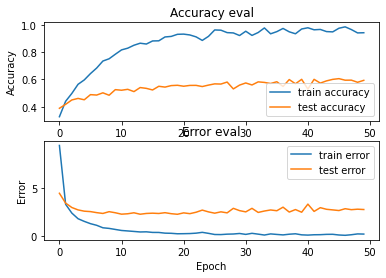

In [38]:
# plot accuracy and error as a function of the epochs
plot_history(history)

## Managing Overfitting

Overfitting is a concept in data science, which occurs when a statistical model fits exactly against its training data. 

In [39]:
# build network topology
model_regularized = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

In [40]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_regularized.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
# train model
history = model_regularized.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
219/219 [==============================] - 3s 13ms/step - loss: 22.0472 - accuracy: 0.1545 - val_loss: 3.4901 - val_accuracy: 0.1729
Epoch 2/100
219/219 [==============================] - 3s 16ms/step - loss: 6.0483 - accuracy: 0.1528 - val_loss: 3.4711 - val_accuracy: 0.1328
Epoch 3/100
219/219 [==============================] - 3s 16ms/step - loss: 4.3411 - accuracy: 0.1405 - val_loss: 3.4943 - val_accuracy: 0.1111
Epoch 4/100
219/219 [==============================] - 3s 12ms/step - loss: 3.8823 - accuracy: 0.1359 - val_loss: 3.4861 - val_accuracy: 0.1132
Epoch 5/100
219/219 [==============================] - 4s 17ms/step - loss: 3.7040 - accuracy: 0.1306 - val_loss: 3.4782 - val_accuracy: 0.1135
Epoch 6/100
219/219 [==============================] - 3s 12ms/step - loss: 3.5896 - accuracy: 0.1429 - val_loss: 3.4294 - val_accuracy: 0.1389
Epoch 7/100
219/219 [==============================] - 3s 15ms/step - loss: 3.5582 - accuracy: 0.1528 - val_loss: 3.4094 - val_accuracy

219/219 [==============================] - 4s 17ms/step - loss: 2.1328 - accuracy: 0.4094 - val_loss: 2.1976 - val_accuracy: 0.4002
Epoch 58/100
219/219 [==============================] - 4s 17ms/step - loss: 2.1144 - accuracy: 0.4096 - val_loss: 2.2310 - val_accuracy: 0.4069
Epoch 59/100
219/219 [==============================] - 3s 13ms/step - loss: 2.0776 - accuracy: 0.4306 - val_loss: 2.1951 - val_accuracy: 0.4172
Epoch 60/100
219/219 [==============================] - 3s 13ms/step - loss: 2.0697 - accuracy: 0.4263 - val_loss: 2.1576 - val_accuracy: 0.4102
Epoch 61/100
219/219 [==============================] - 4s 17ms/step - loss: 2.0414 - accuracy: 0.4245 - val_loss: 2.2023 - val_accuracy: 0.4419
Epoch 62/100
219/219 [==============================] - 4s 17ms/step - loss: 2.0035 - accuracy: 0.4432 - val_loss: 2.1549 - val_accuracy: 0.4289
Epoch 63/100
219/219 [==============================] - 3s 14ms/step - loss: 1.9797 - accuracy: 0.4471 - val_loss: 2.1151 - val_accuracy: 0.434

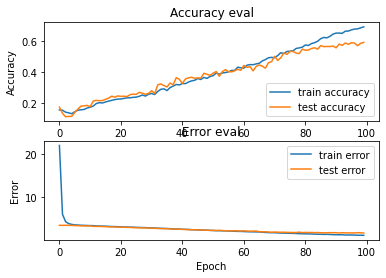

In [42]:
# plot accuracy and error as a function of the epochs
plot_history(history)

## Convolutional Neural Network

In [43]:
# create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [44]:
X_train.shape

(5991, 130, 13, 1)

In [45]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [46]:

# build the CNN
model_cnn = keras.Sequential()

# 1st conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))

# output layer
model_cnn.add(keras.layers.Dense(10, activation='softmax'))

In [47]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 11, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 6, 32)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 6, 32)         128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 4, 32)         9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 2, 32)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 2, 32)         128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 1, 32)        

In [ ]:
# train model
history = model_cnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50)

Epoch 1/50
188/188 [==============================] - 8s 40ms/step - loss: 2.2987 - accuracy: 0.2524 - val_loss: 1.8877 - val_accuracy: 0.3425
Epoch 2/50
188/188 [==============================] - 7s 39ms/step - loss: 1.7866 - accuracy: 0.3824 - val_loss: 1.5351 - val_accuracy: 0.4526
Epoch 3/50
188/188 [==============================] - 10s 51ms/step - loss: 1.6132 - accuracy: 0.4308 - val_loss: 1.4127 - val_accuracy: 0.4913
Epoch 4/50
188/188 [==============================] - 9s 50ms/step - loss: 1.5025 - accuracy: 0.4700 - val_loss: 1.3414 - val_accuracy: 0.5174
Epoch 5/50
188/188 [==============================] - 10s 54ms/step - loss: 1.4048 - accuracy: 0.5031 - val_loss: 1.2645 - val_accuracy: 0.5507
Epoch 6/50
188/188 [==============================] - 10s 52ms/step - loss: 1.3326 - accuracy: 0.5199 - val_loss: 1.2260 - val_accuracy: 0.5481
Epoch 7/50
188/188 [==============================] - 9s 46ms/step - loss: 1.2911 - accuracy: 0.5348 - val_loss: 1.1796 - val_accuracy: 0.5

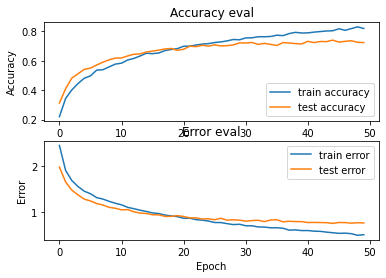

In [49]:
# plot accuracy and error as a function of the epochs
plot_history(history)

In [50]:
# evaluate model on Test Set
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

79/79 - 0s - loss: 0.8041 - accuracy: 0.7301

Test accuracy: 0.7300760746002197


In [51]:
model_cnn.save("Music_Genre_10_CNN")

INFO:tensorflow:Assets written to: Music_Genre_10_CNN\assets


In [52]:
model_cnn.save("Music_Genre_10_CNN.h5")

In [53]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("Music_Genre_10_CNN.h5")

## Prediction on Test Set

In [54]:
# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]

In [55]:
X_to_predict.shape

(130, 13, 1)

In [56]:
print("Real Genre:", y_to_predict)

Real Genre: 3


In [57]:
# add a dimension to input data for sample - model.predict() expects a 4d array in this case
X_to_predict = X_to_predict[np.newaxis, ...] # array shape (1, 130, 13, 1)

In [58]:
X_to_predict.shape

(1, 130, 13, 1)

In [59]:

# perform prediction
prediction = model_cnn.predict(X_to_predict)

In [60]:
# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Predicted Genre: 8


In [61]:
# pick a sample to predict from the test set
X_to_predict = X_test[50]
y_to_predict = y_test[50]

print("Real Genre:", y_to_predict)

X_to_predict = X_to_predict[np.newaxis, ...]

prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Real Genre: 8
Predicted Genre: 2


In [62]:
len(X_test)

2497

In [63]:
for n in range(10):

  i = random.randint(0,len(X_test))
  # pick a sample to predict from the test set
  X_to_predict = X_test[i]
  y_to_predict = y_test[i]

  print("\nReal Genre:", y_to_predict)

  X_to_predict = X_to_predict[np.newaxis, ...]

  prediction = model_cnn.predict(X_to_predict)

  # get index with max value
  predicted_index = np.argmax(prediction, axis=1)

  print("Predicted Genre:", int(predicted_index))


Real Genre: 8
Predicted Genre: 8

Real Genre: 7
Predicted Genre: 7

Real Genre: 4
Predicted Genre: 8

Real Genre: 5
Predicted Genre: 5

Real Genre: 4
Predicted Genre: 4

Real Genre: 5
Predicted Genre: 5

Real Genre: 9
Predicted Genre: 3

Real Genre: 6
Predicted Genre: 6

Real Genre: 7
Predicted Genre: 7

Real Genre: 6
Predicted Genre: 6


## Prediction on New Songs

In [64]:
# Audio files pre-processing
def process_input(audio_file, track_duration):

  SAMPLE_RATE = 22050
  NUM_MFCC = 13
  N_FTT=2048
  HOP_LENGTH=512
  TRACK_DURATION = track_duration # measured in seconds
  SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
  NUM_SEGMENTS = 10

  samples_per_segment = int(SAMPLES_PER_TRACK / NUM_SEGMENTS)
  num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / HOP_LENGTH)

  signal, sample_rate = librosa.load(audio_file, sr=SAMPLE_RATE)
  
  for d in range(10):

    # calculate start and finish sample for current segment
    start = samples_per_segment * d
    finish = start + samples_per_segment

    # extract mfcc
    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=NUM_MFCC, n_fft=N_FTT, hop_length=HOP_LENGTH)
    mfcc = mfcc.T

    return mfcc

In [65]:
genre_dict = {0:"hiphop",1:"country",2:"jazz",3:"classical",4:"metal",5:"pop",6:"rock",7:"blues",8:"reggae",9:"disco"}

In [1]:
new_input_mfcc = process_input("./songs/test.wav", 30)

NameError: name 'process_input' is not defined

In [76]:
type(new_input_mfcc)

numpy.ndarray

In [77]:
new_input_mfcc.shape

(130, 13)

In [78]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape

(1, 130, 13, 1)

In [79]:
prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])

Predicted Genre: jazz
